In [355]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import subprocess
import pandas as pd
from photutils.aperture import CircularAperture,aperture_photometry


In [125]:
# check which parameters will be on your output file
# ideally we want to get MAG_AUTO, MAGERR_AUTO, X_IMAGE, Y_IMAGE, ALPHA_J2000, DELTA_J2000, CLASS_STAR
file = 'default.param'

with open(file, 'r') as text:
    textfile = text.read()
    print(textfile)

#NUMBER

#FLUX_ISO
#FLUXERR_ISO
#MAG_ISO
#MAGERR_ISO

#FLUX_ISOCOR
#FLUXERR_ISOCOR
#MAG_ISOCOR
#MAGERR_ISOCOR

#FLUX_APER(1)
#FLUXERR_APER(1)
#MAG_APER(1)
#MAGERR_APER(1)

#FLUX_AUTO
#FLUXERR_AUTO
MAG_AUTO
MAGERR_AUTO

#FLUX_BEST
#FLUXERR_BEST
#MAG_BEST
#MAGERR_BEST

#KRON_RADIUS
#BACKGROUND

#THRESHOLD
#MU_THRESHOLD
#FLUX_MAX
#MU_MAX
#ISOAREA_IMAGE
#ISOAREA_WORLD

#XMIN_IMAGE
#YMIN_IMAGE
#XMAX_IMAGE
#YMAX_IMAGE

X_IMAGE
Y_IMAGE
#X_WORLD
#Y_WORLD
#ALPHA_SKY
#DELTA_SKY
ALPHA_J2000
DELTA_J2000
#ALPHA_B1950
#DELTA_B1950

#X2_IMAGE
#Y2_IMAGE
#XY_IMAGE
#X2_WORLD
#Y2_WORLD
#XY_WORLD

#CXX_IMAGE
#CYY_IMAGE
#CXY_IMAGE
#CXX_WORLD
#CYY_WORLD
#CXY_WORLD

#A_IMAGE
#B_IMAGE
#A_WORLD
#B_WORLD

#THETA_IMAGE
#THETA_WORLD
#THETA_SKY
#THETA_J2000
#THETA_B1950

#ELONGATION
#ELLIPTICITY

#ERRX2_IMAGE
#ERRY2_IMAGE
#ERRXY_IMAGE
#ERRX2_WORLD
#ERRY2_WORLD
#ERRXY_WORLD

#ERRCXX_IMAGE
#ERRCYY_IMAGE
#ERRCXY_IMAGE
#ERRCXX_WORLD
#ERRCYY_WORLD
#ERRCXY_WORLD

#ERRA_IMAGE
#ERRB_IMAGE
#ERRA_WORLD
#ERRB_WORLD

#ERRTHET

In [126]:
# check the parameters to make sure you modify all the ones you need in bash
file = 'default.sex'

with open(file, 'r') as text:
    textfile = text.read()
    print(textfile)

# Default configuration file for SExtractor V1.2b14 - > 2.0
# EB 23/07/98
# (*) indicates parameters which can be omitted from this config file.

#-------------------------------- Catalog ------------------------------------

CATALOG_NAME	F606_gauss.cat	# name of the output catalog
CATALOG_TYPE	ASCII_HEAD   	# "NONE","ASCII_HEAD","ASCII","FITS_1.0"
				# or "FITS_LDAC"

PARAMETERS_NAME	default.param	# name of the file containing catalog contents

#------------------------------- Extraction ----------------------------------

DETECT_TYPE	CCD		# "CCD" or "PHOTO" (*)
FLAG_IMAGE	flag.fits	# filename for an input FLAG-image
DETECT_MINAREA	6.		# minimum number of pixels above threshold
DETECT_THRESH	2		# <sigmas> or <threshold>,<ZP> in mag.arcsec-2
ANALYSIS_THRESH	2		# <sigmas> or <threshold>,<ZP> in mag.arcsec-2
THRESH_TYPE	 relative
              
FILTER		Y		# apply filter for detection ("Y" or "N")?
FILTER_NAME default.conv	# name of the file containing the filter

DEBLEND_NTHRESH	32		# N

In [127]:
# these parameters are set for all runs on all filters

det = '1.5'
minarea = '5'

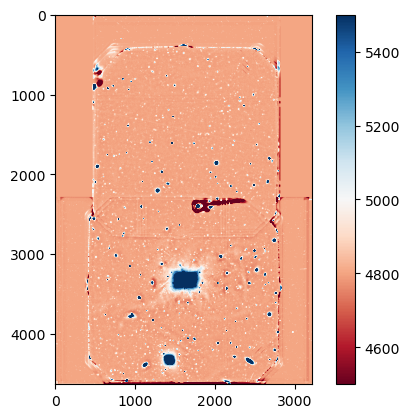

In [301]:
# we can get important parameters from the header to make sure we are not introducing any noise by using the wrong .sex file
hdu = fits.open('sky_g.fits')
gain = str(hdu[0].header['GAIN'])
rdnoise = str(hdu[0].header['RDNOISE'])
pxsc = str(hdu[1].header['PIXSCALE'])
plt.imshow(hdu[1].data,vmax=5500,vmin=4500,cmap='RdBu')
plt.colorbar()

In [129]:
# this could work if i wasnt running this remotely 

#from imexam.imexamine import Imexamine
#from astropy.io import fits

#get your data into an array
#data=fits.getdata('sky_g.fits')

#get an object up with your data attached
#plots=Imexamine()
#plots.set_data(data)

In [130]:
# we don't have seeing as a parameter
# it can be obtained by fitting a psf to bright objects or by visually inspecting the image 

seeing = '0.8'


In [131]:
# important to check the catalog output name matches the chosen filter 

let = "g"
filt = "gauss"
flt = "gauss_4.0_7x7.conv"

ptg = "sex sky_"+let+".fits[1] -CATALOG_NAME "+let+"_"+filt+".cat -FILTER_NAME "+flt+" -CHECKIMAGE_NAME check_"+let+".fits"
pt =  " -SEEING_FWHM "+seeing+" -DETECT_THRESH "+det+" -DETECT_MINAREA "+minarea+" -GAIN "+gain+" -RDNOISE "+rdnoise+" -PIXEL_SCALE "+pxsc
sx = ptg+pt
print(sx)
subprocess.run(sx, capture_output=True, shell=True)

sex sky_g.fits[1] -CATALOG_NAME g_gauss.cat -FILTER_NAME gauss_4.0_7x7.conv -CHECKIMAGE_NAME check_g.fits -SEEING_FWHM 0.8 -DETECT_THRESH 1.5 -DETECT_MINAREA 5 -GAIN 2.21 -RDNOISE 1.067707825203131 -PIXEL_SCALE 0.14576


CompletedProcess(args='sex sky_g.fits[1] -CATALOG_NAME g_gauss.cat -FILTER_NAME gauss_4.0_7x7.conv -CHECKIMAGE_NAME check_g.fits -SEEING_FWHM 0.8 -DETECT_THRESH 1.5 -DETECT_MINAREA 5 -GAIN 2.21 -RDNOISE 1.067707825203131 -PIXEL_SCALE 0.14576', returncode=0, stdout=b'', stderr=b'\n> WARNING: RDNOISE keyword unknown\n\n.\n----- SExtractor 2.19.5 started on 2023-03-01 at 15:36:51 with 1 thread\n\nSetting catalog parameters.\nReading detection filter.\nInitializing Neural Network.\nReading Neural Network Weights.\nInitializing check-image(s).\nInitializing catalog.\nLooking for sky_g.fits.\n----- Measuring from: sky_g.fits [1/5]\n      "Unnamed" / no ext. header / 3212x4631 / 32 bits (floats)\nDetection+Measurement image: Setting up background maps.\nFiltering background map(s).\nComputing background d-map.\nComputing background-noise d-map.\n(M+D) Background: 4801.4     RMS: 20.3272    / Threshold: 30.4909    \nScanning image.\n       1  482.7   52.2  11.8   3.9       180314 ____A___\n   

In [132]:
let = "g"
filt = "mex"
flt = "mexhat_4.0_9x9.conv"

ptg = "sex sky_"+let+".fits[1] -CATALOG_NAME "+let+"_"+filt+".cat -FILTER_NAME "+flt+" -CHECKIMAGE_NAME check_"+let+".fits"
pt =  " -SEEING_FWHM "+seeing+" -DETECT_THRESH "+det+" -DETECT_MINAREA "+minarea+" -GAIN "+gain+" -RDNOISE "+rdnoise+" -PIXEL_SCALE "+pxsc
sx = ptg+pt
print(sx)
subprocess.run(sx, capture_output=True, shell=True)

sex sky_g.fits[1] -CATALOG_NAME g_mex.cat -FILTER_NAME mexhat_4.0_9x9.conv -CHECKIMAGE_NAME check_g.fits -SEEING_FWHM 0.8 -DETECT_THRESH 1.5 -DETECT_MINAREA 5 -GAIN 2.21 -RDNOISE 1.067707825203131 -PIXEL_SCALE 0.14576


CompletedProcess(args='sex sky_g.fits[1] -CATALOG_NAME g_mex.cat -FILTER_NAME mexhat_4.0_9x9.conv -CHECKIMAGE_NAME check_g.fits -SEEING_FWHM 0.8 -DETECT_THRESH 1.5 -DETECT_MINAREA 5 -GAIN 2.21 -RDNOISE 1.067707825203131 -PIXEL_SCALE 0.14576', returncode=0, stdout=b'', stderr=b'\n> WARNING: RDNOISE keyword unknown\n\n.\n----- SExtractor 2.19.5 started on 2023-03-01 at 15:36:54 with 1 thread\n\nSetting catalog parameters.\nReading detection filter.\nInitializing Neural Network.\nReading Neural Network Weights.\nInitializing check-image(s).\nInitializing catalog.\nLooking for sky_g.fits.\n----- Measuring from: sky_g.fits [1/5]\n      "Unnamed" / no ext. header / 3212x4631 / 32 bits (floats)\nDetection+Measurement image: Setting up background maps.\nFiltering background map(s).\nComputing background d-map.\nComputing background-noise d-map.\n(M+D) Background: 4801.4     RMS: 20.3272    / Threshold: 30.4909    \nScanning image.\n\n> WARNING: Object at position 2816,596 may have some apertur

In [133]:
let = "i"
filt = "gauss"
flt = "gauss_4.0_7x7.conv"

ptg = "sex sky_"+let+".fits[1] -CATALOG_NAME "+let+"_"+filt+".cat -FILTER_NAME "+flt+" -CHECKIMAGE_NAME check_"+let+".fits"
pt =  " -SEEING_FWHM "+seeing+" -DETECT_THRESH "+det+" -DETECT_MINAREA "+minarea+" -GAIN "+gain+" -RDNOISE "+rdnoise+" -PIXEL_SCALE "+pxsc
sx = ptg+pt
print(sx)
subprocess.run(sx, capture_output=True, shell=True)

sex sky_i.fits[1] -CATALOG_NAME i_gauss.cat -FILTER_NAME gauss_4.0_7x7.conv -CHECKIMAGE_NAME check_i.fits -SEEING_FWHM 0.8 -DETECT_THRESH 1.5 -DETECT_MINAREA 5 -GAIN 2.21 -RDNOISE 1.067707825203131 -PIXEL_SCALE 0.14576


CompletedProcess(args='sex sky_i.fits[1] -CATALOG_NAME i_gauss.cat -FILTER_NAME gauss_4.0_7x7.conv -CHECKIMAGE_NAME check_i.fits -SEEING_FWHM 0.8 -DETECT_THRESH 1.5 -DETECT_MINAREA 5 -GAIN 2.21 -RDNOISE 1.067707825203131 -PIXEL_SCALE 0.14576', returncode=0, stdout=b'', stderr=b'\n> WARNING: RDNOISE keyword unknown\n\n.\n----- SExtractor 2.19.5 started on 2023-03-01 at 15:36:56 with 1 thread\n\nSetting catalog parameters.\nReading detection filter.\nInitializing Neural Network.\nReading Neural Network Weights.\nInitializing check-image(s).\nInitializing catalog.\nLooking for sky_i.fits.\n----- Measuring from: sky_i.fits [1/5]\n      "Unnamed" / no ext. header / 3213x4632 / 32 bits (floats)\nDetection+Measurement image: Setting up background maps.\nFiltering background map(s).\nComputing background d-map.\nComputing background-noise d-map.\n(M+D) Background: 10498      RMS: 51.5172    / Threshold: 77.2758    \nScanning image.\n       1 2752.7   51.6  16.8  11.2       395555 CM__A___\n   

In [134]:
let = "i"
filt = "mex"
flt = "mexhat_4.0_9x9.conv"

ptg = "sex sky_"+let+".fits[1] -CATALOG_NAME "+let+"_"+filt+".cat -FILTER_NAME "+flt+" -CHECKIMAGE_NAME check_"+let+".fits"
pt =  " -SEEING_FWHM "+seeing+" -DETECT_THRESH "+det+" -DETECT_MINAREA "+minarea+" -GAIN "+gain+" -RDNOISE "+rdnoise+" -PIXEL_SCALE "+pxsc
sx = ptg+pt
print(sx)
subprocess.run(sx, capture_output=True, shell=True)

sex sky_i.fits[1] -CATALOG_NAME i_mex.cat -FILTER_NAME mexhat_4.0_9x9.conv -CHECKIMAGE_NAME check_i.fits -SEEING_FWHM 0.8 -DETECT_THRESH 1.5 -DETECT_MINAREA 5 -GAIN 2.21 -RDNOISE 1.067707825203131 -PIXEL_SCALE 0.14576


CompletedProcess(args='sex sky_i.fits[1] -CATALOG_NAME i_mex.cat -FILTER_NAME mexhat_4.0_9x9.conv -CHECKIMAGE_NAME check_i.fits -SEEING_FWHM 0.8 -DETECT_THRESH 1.5 -DETECT_MINAREA 5 -GAIN 2.21 -RDNOISE 1.067707825203131 -PIXEL_SCALE 0.14576', returncode=0, stdout=b'', stderr=b'\n> WARNING: RDNOISE keyword unknown\n\n.\n----- SExtractor 2.19.5 started on 2023-03-01 at 15:37:05 with 1 thread\n\nSetting catalog parameters.\nReading detection filter.\nInitializing Neural Network.\nReading Neural Network Weights.\nInitializing check-image(s).\nInitializing catalog.\nLooking for sky_i.fits.\n----- Measuring from: sky_i.fits [1/5]\n      "Unnamed" / no ext. header / 3213x4632 / 32 bits (floats)\nDetection+Measurement image: Setting up background maps.\nFiltering background map(s).\nComputing background d-map.\nComputing background-noise d-map.\n(M+D) Background: 10498      RMS: 51.5172    / Threshold: 77.2758    \nScanning image.\n       1  474.1  111.4  11.2   0.8      38812.6 CM______\n    

In [135]:
let = "r"
filt = "gauss"
flt = "gauss_4.0_7x7.conv"

ptg = "sex sky_"+let+".fits[1] -CATALOG_NAME "+let+"_"+filt+".cat -FILTER_NAME "+flt+" -CHECKIMAGE_NAME check_"+let+".fits"
pt =  " -SEEING_FWHM "+seeing+" -DETECT_THRESH "+det+" -DETECT_MINAREA "+minarea+" -GAIN "+gain+" -RDNOISE "+rdnoise+" -PIXEL_SCALE "+pxsc
sx = ptg+pt
print(sx)
subprocess.run(sx, capture_output=True, shell=True)

sex sky_r.fits[1] -CATALOG_NAME r_gauss.cat -FILTER_NAME gauss_4.0_7x7.conv -CHECKIMAGE_NAME check_r.fits -SEEING_FWHM 0.8 -DETECT_THRESH 1.5 -DETECT_MINAREA 5 -GAIN 2.21 -RDNOISE 1.067707825203131 -PIXEL_SCALE 0.14576


CompletedProcess(args='sex sky_r.fits[1] -CATALOG_NAME r_gauss.cat -FILTER_NAME gauss_4.0_7x7.conv -CHECKIMAGE_NAME check_r.fits -SEEING_FWHM 0.8 -DETECT_THRESH 1.5 -DETECT_MINAREA 5 -GAIN 2.21 -RDNOISE 1.067707825203131 -PIXEL_SCALE 0.14576', returncode=0, stdout=b'', stderr=b'\n> WARNING: RDNOISE keyword unknown\n\n.\n----- SExtractor 2.19.5 started on 2023-03-01 at 15:37:12 with 1 thread\n\nSetting catalog parameters.\nReading detection filter.\nInitializing Neural Network.\nReading Neural Network Weights.\nInitializing check-image(s).\nInitializing catalog.\nLooking for sky_r.fits.\n----- Measuring from: sky_r.fits [1/5]\n      "Unnamed" / no ext. header / 3213x4630 / 32 bits (floats)\nDetection+Measurement image: Setting up background maps.\nFiltering background map(s).\nComputing background d-map.\nComputing background-noise d-map.\n(M+D) Background: 4871.82    RMS: 17.1083    / Threshold: 25.6625    \nScanning image.\n\n> WARNING: Object at position 526,679 may have some apertur

In [136]:
let = "r"
filt = "mex"
flt = "mexhat_4.0_9x9.conv"

ptg = "sex sky_"+let+".fits[1] -CATALOG_NAME "+let+"_"+filt+".cat -FILTER_NAME "+flt+" -CHECKIMAGE_NAME check_"+let+".fits"
pt =  " -SEEING_FWHM "+seeing+" -DETECT_THRESH "+det+" -DETECT_MINAREA "+minarea+" -GAIN "+gain+" -RDNOISE "+rdnoise+" -PIXEL_SCALE "+pxsc
sx = ptg+pt
print(sx)
subprocess.run(sx, capture_output=True, shell=True)

sex sky_r.fits[1] -CATALOG_NAME r_mex.cat -FILTER_NAME mexhat_4.0_9x9.conv -CHECKIMAGE_NAME check_r.fits -SEEING_FWHM 0.8 -DETECT_THRESH 1.5 -DETECT_MINAREA 5 -GAIN 2.21 -RDNOISE 1.067707825203131 -PIXEL_SCALE 0.14576


CompletedProcess(args='sex sky_r.fits[1] -CATALOG_NAME r_mex.cat -FILTER_NAME mexhat_4.0_9x9.conv -CHECKIMAGE_NAME check_r.fits -SEEING_FWHM 0.8 -DETECT_THRESH 1.5 -DETECT_MINAREA 5 -GAIN 2.21 -RDNOISE 1.067707825203131 -PIXEL_SCALE 0.14576', returncode=0, stdout=b'', stderr=b'\n> WARNING: RDNOISE keyword unknown\n\n.\n----- SExtractor 2.19.5 started on 2023-03-01 at 15:37:15 with 1 thread\n\nSetting catalog parameters.\nReading detection filter.\nInitializing Neural Network.\nReading Neural Network Weights.\nInitializing check-image(s).\nInitializing catalog.\nLooking for sky_r.fits.\n----- Measuring from: sky_r.fits [1/5]\n      "Unnamed" / no ext. header / 3213x4630 / 32 bits (floats)\nDetection+Measurement image: Setting up background maps.\nFiltering background map(s).\nComputing background d-map.\nComputing background-noise d-map.\n(M+D) Background: 4871.82    RMS: 17.1083    / Threshold: 25.6625    \nScanning image.\n\n> WARNING: Object at position 2816,358 may have some apertur

In [137]:
# we could save the outputs as tables but instead we save them as files for easier access and then read them as pandas tables
# this also spares me from having to use a wrapper for sextractor 

In [ ]:
###### ===================== I FILTER =============================

In [298]:
ig = pd.read_csv('i_gauss.cat',delim_whitespace=True,comment='#',names=['MAG_AUTO', 'MAGERR_AUTO', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_J2000', 'DELTA_J2000', 'CLASS_STAR'])
im = pd.read_csv('i_mex.cat',delim_whitespace=True,comment='#',names=['MAG_AUTO', 'MAGERR_AUTO', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_J2000', 'DELTA_J2000', 'CLASS_STAR'])

In [265]:
imex = im[(im['X_IMAGE'] > 450)&(im['X_IMAGE'] < 2700)]
imex = imex.reset_index()
igaus = ig[(ig['X_IMAGE'] > 450)&(ig['X_IMAGE'] < 2700)]
igaus = igaus.reset_index()

In [266]:
# now we want a catalogue that has all objects in gauss + any objects in mexhat that are not in gauss

In [299]:
xg,yg = igaus['X_IMAGE'],igaus['Y_IMAGE']
xm,ym = imex['X_IMAGE'],imex['Y_IMAGE']
fl = igaus['X_IMAGE']*0
igaus['flag'] = fl

In [269]:
for i in range(len(xg)):
    dist = np.sqrt(np.power((xg[i]-xm),2)+(np.power((yg[i]-ym),2)))
    if(np.any(dist<3)):
        fl[i] = 1
        

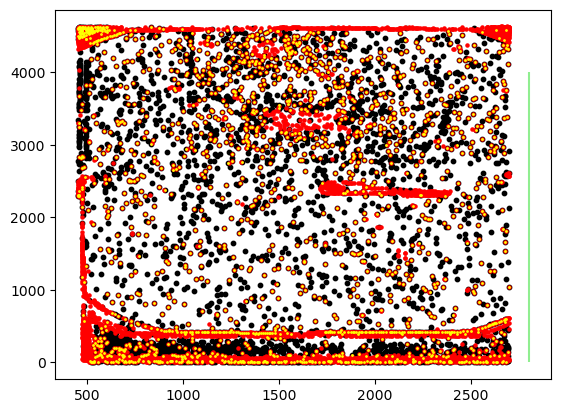

In [270]:
plt.scatter(xg,yg,s=10,c='black')
plt.scatter(xm,ym,s=5,c='red')
plt.scatter(xg[fl==1],yg[fl==1],s=1,c='yellow')
plt.vlines(2800,0,4000,color='lightgreen')

In [278]:
tot = imex.append(igaus[fl==0])

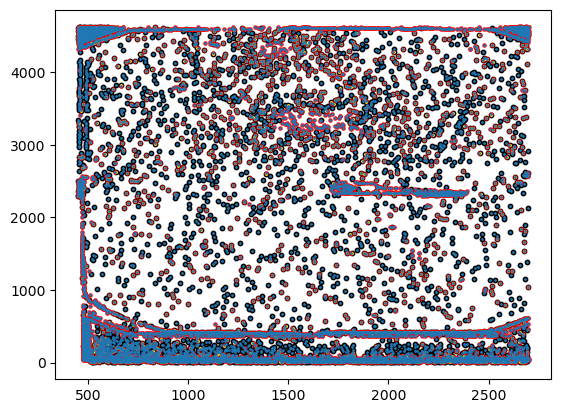

In [279]:
plt.scatter(xg,yg,s=10,c='black')
plt.scatter(xm,ym,s=5,c='red')
plt.scatter(xg[fl==1],yg[fl==1],s=1,c='yellow')
plt.scatter(tot['X_IMAGE'],tot['Y_IMAGE'],s=1)

In [ ]:
###### ===================== G FILTER =============================

In [281]:
gg = pd.read_csv('g_gauss.cat',delim_whitespace=True,comment='#',names=['MAG_AUTO', 'MAGERR_AUTO', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_J2000', 'DELTA_J2000', 'CLASS_STAR'])
gm = pd.read_csv('g_mex.cat',delim_whitespace=True,comment='#',names=['MAG_AUTO', 'MAGERR_AUTO', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_J2000', 'DELTA_J2000', 'CLASS_STAR'])

In [283]:
gmex = gm[(gm['X_IMAGE'] > 450)&(gm['X_IMAGE'] < 2700)]
gmex = gmex.reset_index()
ggaus = gg[(gg['X_IMAGE'] > 450)&(gg['X_IMAGE'] < 2700)]
ggaus = ggaus.reset_index()

In [302]:
xg,yg = ggaus['X_IMAGE'],ggaus['Y_IMAGE']
xm,ym = gmex['X_IMAGE'],gmex['Y_IMAGE']
fl = ggaus['X_IMAGE']*0
ggaus['flag'] = fl

In [303]:
for i in range(len(xg)):
    distg = np.sqrt(np.power((xg[i]-xm),2)+(np.power((yg[i]-ym),2)))
    if(np.any(distg<3)):
        fl[i] = 1
        

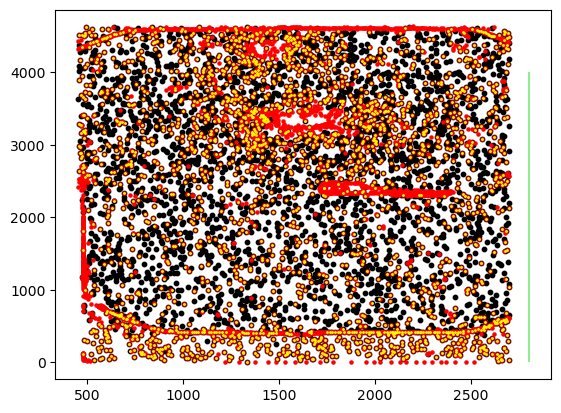

In [304]:
plt.scatter(xg,yg,s=10,c='black')
plt.scatter(xm,ym,s=5,c='red')
plt.scatter(xg[fl==1],yg[fl==1],s=1,c='yellow')
plt.vlines(2800,0,4000,color='lightgreen')

In [305]:
totg = gmex.append(ggaus[fl==0])

In [ ]:
###### ===================== R FILTER =============================

In [306]:
rg = pd.read_csv('r_gauss.cat',delim_whitespace=True,comment='#',names=['MAG_AUTO', 'MAGERR_AUTO', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_J2000', 'DELTA_J2000', 'CLASS_STAR'])
rm = pd.read_csv('r_mex.cat',delim_whitespace=True,comment='#',names=['MAG_AUTO', 'MAGERR_AUTO', 'X_IMAGE', 'Y_IMAGE', 'ALPHA_J2000', 'DELTA_J2000', 'CLASS_STAR'])

In [307]:
rmex = rm[(rm['X_IMAGE'] > 450)&(rm['X_IMAGE'] < 2700)]
rmex = rmex.reset_index()
rgaus = rg[(rg['X_IMAGE'] > 450)&(rg['X_IMAGE'] < 2700)]
rgaus = rgaus.reset_index()

In [266]:
# now we want a catalogue that has all objects in gauss + any objects in mexhat that are not in gauss

In [310]:
xg,yg = rgaus['X_IMAGE'],rgaus['Y_IMAGE']
xm,ym = rmex['X_IMAGE'],rmex['Y_IMAGE']
fl = rgaus['X_IMAGE']*0
rgaus['flag'] = fl

In [311]:
for i in range(len(xg)):
    distr = np.sqrt(np.power((xg[i]-xm),2)+(np.power((yg[i]-ym),2)))
    if(np.any(distr<3)):
        fl[i] = 1
        

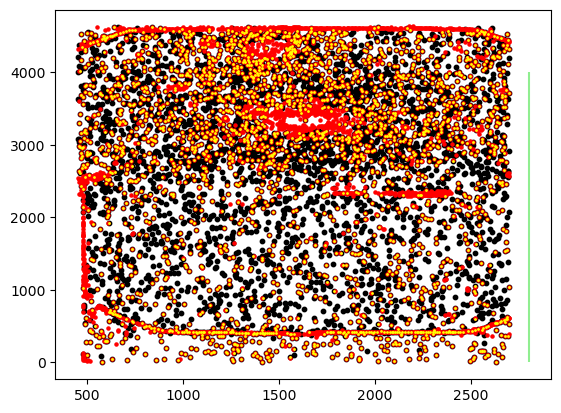

In [312]:
plt.scatter(xg,yg,s=10,c='black')
plt.scatter(xm,ym,s=5,c='red')
plt.scatter(xg[fl==1],yg[fl==1],s=1,c='yellow')
plt.vlines(2800,0,4000,color='lightgreen')

In [313]:
totr = rmex.append(rgaus[fl==0])

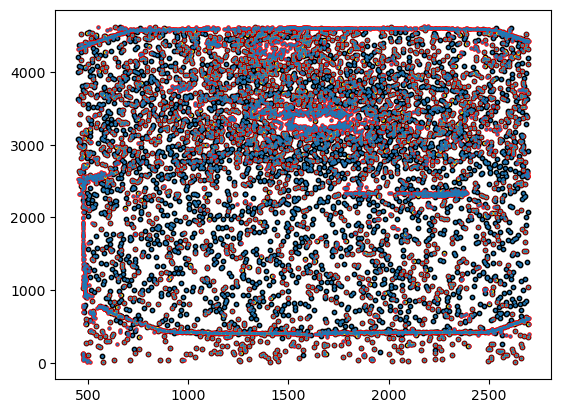

In [314]:
plt.scatter(xg,yg,s=10,c='black')
plt.scatter(xm,ym,s=5,c='red')
plt.scatter(xg[fl==1],yg[fl==1],s=1,c='yellow')
plt.scatter(totr['X_IMAGE'],totr['Y_IMAGE'],s=1)

In [318]:
len(totg)

7029

In [317]:
len(tot)

7864

In [316]:
len(totr)

7091

In [319]:
# all filters are similarly deep but i' filter is as per usual the deepest so we stick with that catalog

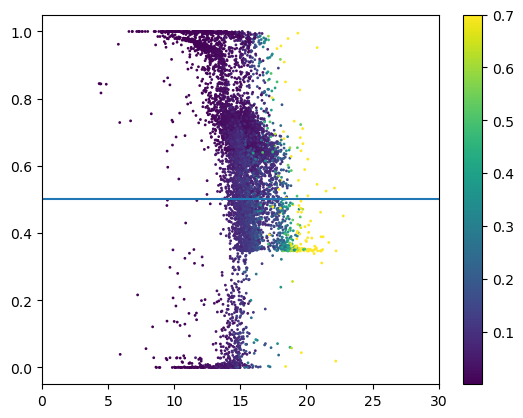

In [334]:
plt.scatter(tot['MAG_AUTO'],tot['CLASS_STAR'],s=1,c=tot['MAGERR_AUTO'],vmax=0.7)
plt.xlim(0,30)
plt.hlines(0.5,0,30)
plt.colorbar()

In [370]:
# we select using CLASS_STAR 
fin = tot[(tot['CLASS_STAR'] > 0.5)&(tot['MAG_AUTO'] < 30)&(tot['Y_IMAGE'] > 400)]
fin = fin.reset_index()

In [371]:
x,y = fin['X_IMAGE'],fin['Y_IMAGE']

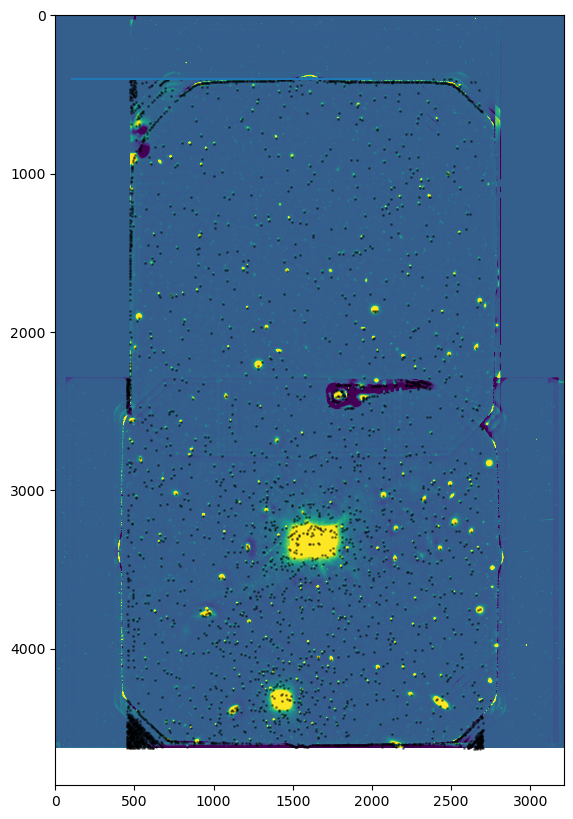

In [372]:
fig,ax = plt.subplots(figsize=(10,10))
plt.imshow(hdu[1].data,vmax=5500,vmin=4500)
plt.scatter(x,y,s=1,c='black',alpha=0.4)
plt.hlines(400,100,2000)

In [376]:
positions = []
for i in range(len(x)):
    positions.append((x[i],y[i]))

In [379]:
aperture = CircularAperture(positions,r=5.)
data = hdu[1].data
table = aperture_photometry(data,aperture)